In [1]:
# Define the URL as a Python variable
url = "https://www.reddydodlapati.com/top10_bioinfo_stats"

# Display the HTML using Python's f-string
from IPython.display import display, HTML

html_code = f"""
<div class="social-share">
  <a href="https://twitter.com/intent/tweet?text=Check out this blog post&url={url}" target="_blank">
    <img src="https://cdn-icons-png.flaticon.com/512/733/733579.png" alt="Share on Twitter" width="24px">
  </a>
  <a href="https://www.linkedin.com/sharing/share-offsite/?url={url}" target="_blank">
    <img src="https://cdn-icons-png.flaticon.com/512/733/733561.png" alt="Share on LinkedIn" width="24px">
  </a>
  <a href="https://www.facebook.com/sharer/sharer.php?u={url}" target="_blank">
    <img src="https://cdn-icons-png.flaticon.com/512/733/733547.png" alt="Share on Facebook" width="24px">
  </a>
</div>
"""

display(HTML(html_code))

In [1]:
import os
import pandas as pd
import numpy as np
import random
import scipy as scp
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Install packages. Uncomment to install and comment back after installing
# %pip install hmmlearn
# %pip install lifelines

<div style="max-width: 100%; font-size:20px; text-align: justify;">
    

In bioinformatics, statistical concepts are pivotal for analyzing and interpreting complex biological data. Below are ten fundamental statistical concepts, each defined with explanations, mathematical formulations, and Python code examples to illustrate their applications.


## 1. Probability Theory and Bayes' Theorem

  Definition: Probability theory quantifies the likelihood of events occurring. Bayes' Theorem provides a way to update the probability of a hypothesis based on new evidence.
  
  Mathematical Formulation: 𝑃 ( 𝐴 ∣ 𝐵 ) = 𝑃 ( 𝐵 ∣ 𝐴 ) × 𝑃 ( 𝐴 ) 𝑃 ( 𝐵 ) P(A∣B)= P(B) P(B∣A)×P(A)​Where:

  𝑃 ( 𝐴 ∣ 𝐵 ) P(A∣B) is the posterior probability of event A given B. 𝑃 ( 𝐵 ∣ 𝐴 ) P(B∣A) is the likelihood of event B given A. 𝑃 ( 𝐴 ) P(A) and 𝑃 ( 𝐵 ) P(B) are the prior probabilities of events A and B, respectively.
  
  Example: In genomics, determining the probability of a disease given a genetic marker involves updating prior knowledge with new genetic data

</div>

In [3]:
# Calculating posterior probability using Bayes' Theorem
def bayes_theorem(prior_A, likelihood_B_given_A, prior_B):
    return (likelihood_B_given_A * prior_A) / prior_B

# Example values
prior_disease = 0.01  # Prior probability of disease
sensitivity = 0.9     # P(Test positive | Disease)
specificity = 0.95    # P(Test negative | No Disease)
prior_no_disease = 1 - prior_disease
false_positive_rate = 1 - specificity

# P(Test positive)
prior_test_positive = (sensitivity * prior_disease) + (false_positive_rate * prior_no_disease)

# P(Disease | Test positive)
posterior_disease_given_positive = bayes_theorem(prior_disease, sensitivity, prior_test_positive)
print(f"Posterior probability of disease given a positive test: {posterior_disease_given_positive:.4f}")


Posterior probability of disease given a positive test: 0.1538


<div style="max-width: 100%; font-size:20px; text-align: justify;">

## 2. Hypothesis Testing

Definition: A statistical method to determine if there is enough evidence to reject a null hypothesis in favor of an alternative hypothesis.

Mathematical Formulation:

Null Hypothesis (𝐻0): Assumes no effect or difference.

Alternative Hypothesis (𝐻1): Assumes an effect or difference exists.
 
Test Statistic: A value calculated from sample data used to decide whether to reject 𝐻0.

p-value: The probability of obtaining a test statistic at least as extreme as the one observed, assuming 𝐻0 is true.


Example: Testing whether a new drug affects gene expression levels compared to a control.

</div>

In [4]:
import numpy as np
from scipy import stats

# Sample data: gene expression levels
control = np.array([5.1, 5.3, 5.5, 5.7, 5.9])
treatment = np.array([5.8, 6.0, 6.2, 6.4, 6.6])

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(treatment, control)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference between groups.")


T-statistic: 3.5000, p-value: 0.0081
Reject the null hypothesis: Significant difference between groups.


<div style="max-width: 100%; font-size:20px; text-align: justify;">

## 3. Regression Analysis

Definition: A set of statistical processes for estimating relationships among variables.

Mathematical Formulation:

Linear Regression Model:

𝑌 =
𝛽
0
+
𝛽
1
𝑋
+
𝜖
Y=β
0
​
 +β
1
​
 X+ϵ
𝑌

Y: Dependent variable

X: Independent variable

β
0
​
 : Intercept

β
1
​
 : Slope

ϵ: Error term


Example: Predicting protein concentration based on gene expression levels.

</div>

Intercept: 0.10, Slope: 0.98


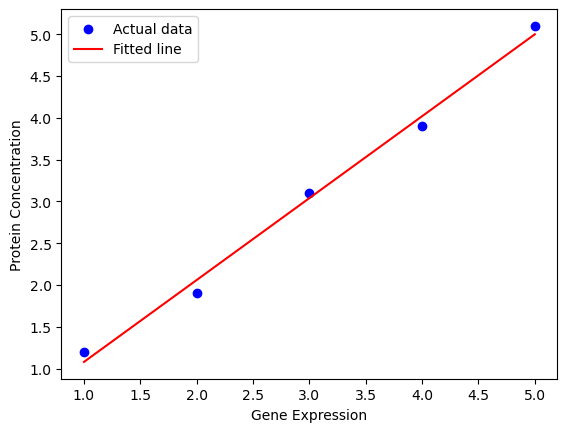

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: gene expression (X) and protein concentration (Y)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([1.2, 1.9, 3.1, 3.9, 5.1])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Predict and plot
Y_pred = model.predict(X)
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred, color='red', label='Fitted line')
plt.xlabel('Gene Expression')
plt.ylabel('Protein Concentration')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Sample data: gene expression levels in different tissues
data = {
    'Tissue': ['Liver', 'Liver', 'Liver', 'Heart', 'Heart', 'Heart', 'Brain', 'Brain', 'Brain'],
    'Expression': [5.1, 5.3, 5.5, 6.1, 6.3, 6.5, 7.1, 7.3, 7.5]
}
df = pd.DataFrame(data)

# Perform one-way ANOVA
liver = df[df['Tissue'] == 'Liver']['Expression']
heart = df[df['Tissue'] == 'Heart']['Expression']
brain = df[df['Tissue'] == 'Brain']['Expression']

f_stat, p_val = stats.f_oneway(liver, heart, brain)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Significant differences exist between tissue groups.")
else:
    print("Fail to reject the null hypothesis: No significant differences between tissue groups.")


F-statistic: 75.0000, p-value: 0.0001
Reject the null hypothesis: Significant differences exist between tissue groups.


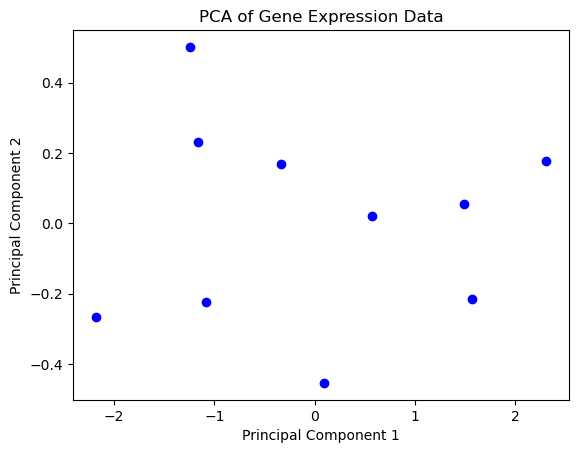

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample data: gene expression levels (rows: genes, columns: samples)
data = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]
])

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_std)

# Plot the results
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Gene Expression Data')
plt.show()


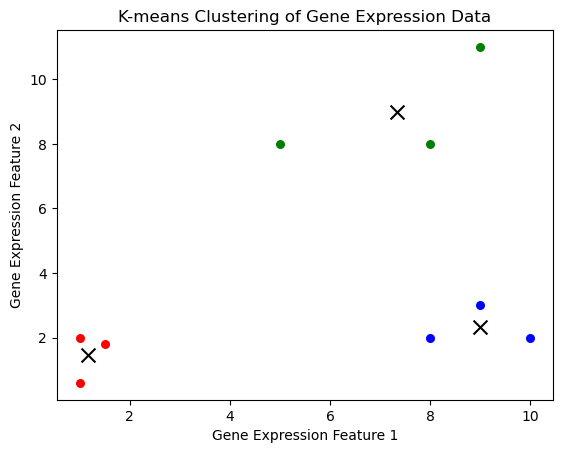

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Sample data: gene expression levels
data = np.array([
    [1.0, 2.0],
    [1.5, 1.8],
    [5.0, 8.0],
    [8.0, 8.0],
    [1.0, 0.6],
    [9.0, 11.0],
    [8.0, 2.0],
    [10.0, 2.0],
    [9.0, 3.0]
])

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot the results
colors = ['r', 'g', 'b']
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], c=colors[labels[i]], s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black')
plt.xlabel('Gene Expression Feature 1')
plt.ylabel('Gene Expression Feature 2')
plt.title('K-means Clustering of Gene Expression Data')
plt.show()


In [9]:
# Define states and transition matrix
states = ['A', 'C', 'G', 'T']
transition_matrix = {
    'A': {'A': 0.3, 'C': 0.2, 'G': 0.2, 'T': 0.3},
    'C': {'A': 0.1, 'C': 0.4, 'G': 0.4, 'T': 0.1},
    'G': {'A': 0.2, 'C': 0.3, 'G': 0.3, 'T': 0.2},
    'T': {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25},
}

# Generate a Markov sequence
def generate_markov_sequence(length, start_state='A'):
    sequence = [start_state]
    current_state = start_state
    for _ in range(length - 1):
        next_state = random.choices(
            population=states,
            weights=[transition_matrix[current_state][s] for s in states]
        )[0]
        sequence.append(next_state)
        current_state = next_state
    return ''.join(sequence)

# Generate a sequence of length 50 starting with 'A'
markov_sequence = generate_markov_sequence(50, start_state='A')
print("Generated Markov Sequence:", markov_sequence)


Generated Markov Sequence: AAATCGTGTTTAATCGGCGACCGCCGTATCCCCGCCTGACGTTGGGAATG


In [10]:
import logging

# Set logging level to suppress informational messages
logging.getLogger().setLevel(logging.ERROR)

# Your code here

from hmmlearn import hmm

# Define the HMM
model = hmm.MultinomialHMM(n_components=2, n_iter=100, tol=0.01)

# Encoding Exon and Intron states as 0 and 1
# Assume 'A', 'C', 'G', 'T' as observations (encoded as 0, 1, 2, 3)
states = ['Exon', 'Intron']
observations = ['A', 'C', 'G', 'T']

# Transition probability matrix for Exon and Intron
# High self-transition probabilities to simulate longer sequences
model.startprob_ = np.array([0.5, 0.5])  # Start with equal probability
model.transmat_ = np.array([
    [0.8, 0.2],  # Exon to Exon, Exon to Intron
    [0.2, 0.8]   # Intron to Exon, Intron to Intron
])

# Emission probability matrix for Exon and Intron
# Exons may have slightly different nucleotide distribution
model.emissionprob_ = np.array([
    [0.25, 0.25, 0.25, 0.25],  # Equal for simplicity in exons
    [0.1, 0.4, 0.4, 0.1]       # Higher C/G content in introns
])

# Generate a sample sequence (observations encoded as integers)
sequence = np.array([[0, 1, 2, 3, 2, 1, 0, 2, 3, 0]]).T  # Sample DNA sequence as 'A', 'C', 'G', 'T'

# Fit the model to the sequence and predict the hidden states
model = model.fit(sequence)
hidden_states = model.predict(sequence)

# Decode and print the hidden states
decoded_states = [states[state] for state in hidden_states]
print("Observed Sequence: ", ''.join([observations[i[0]] for i in sequence]))
print("Predicted Hidden States:", decoded_states)


Observed Sequence:  ACGTGCAGTA
Predicted Hidden States: ['Intron', 'Exon', 'Intron', 'Exon', 'Intron', 'Exon', 'Intron', 'Exon', 'Intron', 'Exon']


In [11]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# Sample p-values from multiple tests
p_values = np.array([0.01, 0.04, 0.03, 0.05, 0.20, 0.001, 0.15, 0.005])

# Apply Benjamini-Hochberg correction for False Discovery Rate (FDR)
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# Results
for i, (p_val, p_corr, rej) in enumerate(zip(p_values, pvals_corrected, reject)):
    print(f"Test {i+1}: Original p-value = {p_val:.3f}, Corrected p-value = {p_corr:.3f}, Reject null hypothesis: {rej}")


Test 1: Original p-value = 0.010, Corrected p-value = 0.027, Reject null hypothesis: True
Test 2: Original p-value = 0.040, Corrected p-value = 0.064, Reject null hypothesis: False
Test 3: Original p-value = 0.030, Corrected p-value = 0.060, Reject null hypothesis: False
Test 4: Original p-value = 0.050, Corrected p-value = 0.067, Reject null hypothesis: False
Test 5: Original p-value = 0.200, Corrected p-value = 0.200, Reject null hypothesis: False
Test 6: Original p-value = 0.001, Corrected p-value = 0.008, Reject null hypothesis: True
Test 7: Original p-value = 0.150, Corrected p-value = 0.171, Reject null hypothesis: False
Test 8: Original p-value = 0.005, Corrected p-value = 0.020, Reject null hypothesis: True


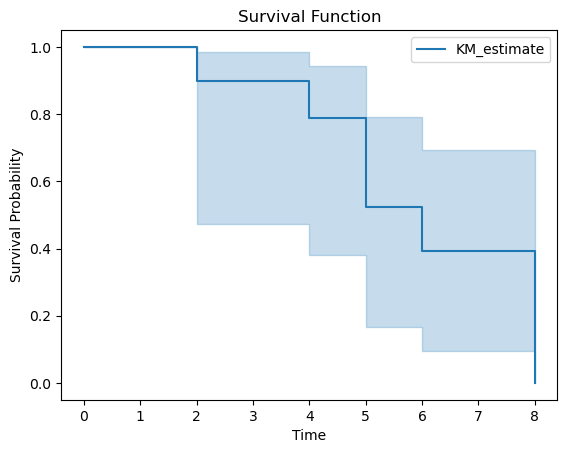

In [12]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Sample data: survival times and event occurrences
data = {
    'Time': [5, 6, 6, 2, 4, 4, 3, 5, 8, 6],
    'Event': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
}
df = pd.DataFrame(data)

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=df['Time'], event_observed=df['Event'])

# Plot the survival function
kmf.plot_survival_function()
plt.title('Survival Function')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()


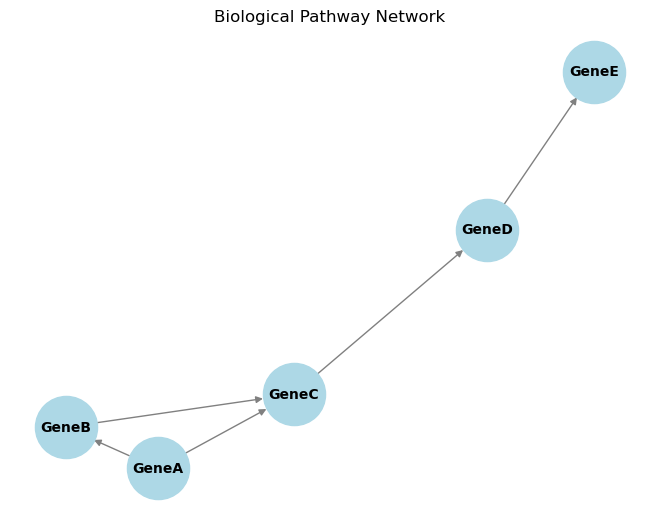

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample directed graph representing a biological pathway
G = nx.DiGraph()

# Add nodes (genes/proteins)
nodes = ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE']
G.add_nodes_from(nodes)

# Add edges (interactions)
edges = [('GeneA', 'GeneB'), ('GeneB', 'GeneC'), ('GeneC', 'GeneD'), ('GeneD', 'GeneE'), ('GeneA', 'GeneC')]
G.add_edges_from(edges)

# Draw the network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight='bold')
plt.title('Biological Pathway Network')
plt.show()
